In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from arch import arch_model

In [24]:
sp_price = pd.read_csv('data/sp500.csv', index_col='Date', parse_dates=True)

In [26]:
# Calculate daily returns as percentage price changes
sp_price['Return'] = round(100 * (sp_price['Close'].pct_change()),3)

sp_price['Return'].fillna(-0.324, inplace=True)  # Fill NaN values with 0

# View the data
print(sp_price.head(10))

              Close  Return
Date                       
2010-07-01  1027.37  -0.324
2010-07-02  1022.58  -0.466
2010-07-06  1028.06   0.536
2010-07-07  1060.27   3.133
2010-07-08  1070.24   0.940
2010-07-09  1077.96   0.721
2010-07-12  1078.75   0.073
2010-07-13  1095.34   1.538
2010-07-14  1095.17  -0.016
2010-07-15  1096.48   0.120


C:\Users\iantm\AppData\Local\Temp\ipykernel_19464\993486767.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sp_price['Return'].fillna(-0.324, inplace=True)  # Fill NaN values with 0


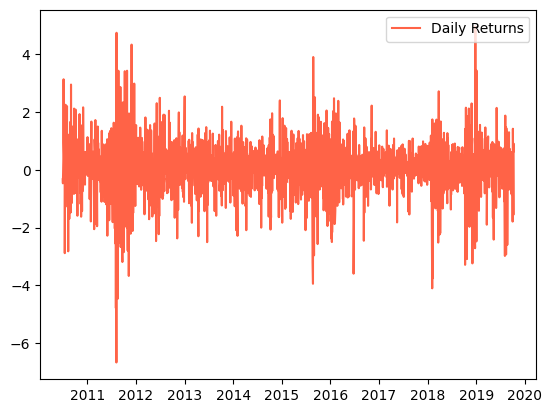

In [27]:
# plot the data
plt.plot(sp_price['Return'], color = 'tomato', label = 'Daily Returns')
plt.legend(loc='upper right')
plt.show()

In [28]:
# Calculate daily std of returns
std_daily = sp_price['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

Daily volatility:  0.92%


In [30]:
# Convert daily volatility to monthly volatility
std_monthly = math.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
std_annual = math.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.2f}%'.format(std_annual))

Monthly volatility:  4.20%
Annual volatility:  14.54%


In [31]:
# Specify GARCH model assumptions
basic_gm = arch_model(sp_price['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.974691668893
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9592622164846
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.957540619865
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.957540619117
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


In [32]:
# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.92
Method:            Maximum Likelihood   BIC:                           5574.94
                                        No. Observations:                 2336
Date:                Mon, Jul 21 2025   Df Residuals:                     2335
Time:                        13:34:06   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0772  1.445e-02      5.345  9.022e-08 [4.892e-0

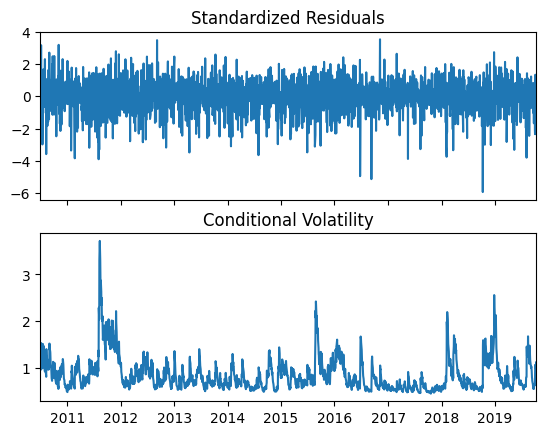

In [33]:
# Plot fitted results
gm_result.plot()
plt.show()

In [34]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

# Print the forecast variance
print(gm_forecast.variance[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2019-10-10  0.994093  0.988383  0.982933  0.977731  0.972766
